### SIR modelēšana
S - susceptable - neizslimojošie
I - Infected - inficētie
R - recovered - atveseļojušies

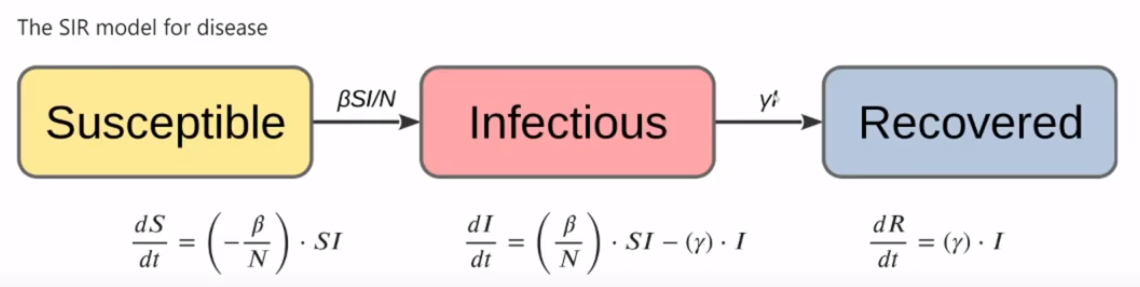


Visi kopā veido kopējo populāciju

$S(t)+I(t)+R(t)=N$

Ir trīs izmaiņas (ātrumi):
* $\frac{dS}{dt}$ - ātrums, kādā samazinās cilvēki, kuri varētu tikt inficēti (uzņēmīgie). 
* $\frac{dI}{dt}$ - ātrums, kādā pieaug inficētie cilvēki
* $\frac{dR}{dt}$ - ātrums, kādā pieaug atveseļotie cilvēki

Šīs izmaiņas var aprakstīt ar trīs diferenciālvienādojumiem, kur katrs parāda, kas notiek ar S, I un R.

Ideja - inficēšanos rada mijiedarbība. Mijiedarbība ir tieši proporcionāla tam, cik daudz ir inficētie, kā arī, cik daudz ir uzņēmīgie. Divreiz vairāk inficētie radīs divreiz lielāku inficēšanās ātrumu. Ja inficētie satiekas ar divreiz vairāk uzņēmīgajiem, arī tad mijiedarbība ir divreiz lielāka un inficēšanās ātrums divreiz lielāks. Tāpēc var teikt, ka $dS/dt \propto S$ un $dS/dt \propto I$. Lai izveidotu vienādojumu, nepieciešama proporcionalitātes konstante $\beta$, kuru var attiecināt uz populācijas skaitu $N$. Tā kā uzņēmīgo skaits krītas, proporcionalitātes konstante ir negatīva.

Tādā veidā veidojas pirmais izmaiņas ātrums $\frac{dS}{dt}=-\frac{b}{N}SI$


Inficēšanās ātrums $\frac{dI}{dt}$ ir saistīts ar to, ka pieaug inficēto cilvēku skaits, bet ir daļa inficēto, kas atveseļojas. Inficēto cilvēku pieauguma daļa ir vienāda ar saslimušo uzņēmīgo daļu $\frac{b}{N}SI$, taču tāpēc, ka inficēto cilvēku daļa pieaug, proporcionalitātes konstante ir pozitīva. Savukārt tie, kuri atveseļojas, samazina inficēto cilvēku skaitu $-\gamma I$

$\gamma$ raksturo proporcionalitātes koeficientu tam, cik strauji pieaug skaits cilvēkiem, kuri atveseļojas. Jo lielāks $\gamma$, jo straujāk atveseļojas (samazina inficēto skaitu)

### Kopsavilkums

Tātad ir jāatrisina trīs dif. vienādojumu sistēma

$$ \frac{dS}{dt}=-\frac{b}{N}SI
\\
\\
\frac{dI}{dt}=\frac{b}{N}SI-\gamma I
\\ 
\\
\frac{dR}{dt}=\gamma I $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

A būs sistēma. $A=(S,I,R)$
izveidosim sistēmu `dAdt`, izmantojot iepriekšējos dif.vienādojumus.

In [20]:
def dAdt(A,t,N, beta,gamma):    
    #sākuma nosacījumi
    S=A[0]
    I=A[1]
    R=A[2]
    
    return [
        -beta/N * S * I,
        beta/N * S * I - gamma * I,
        gamma*I      
    ]

### Sākuma nosacījumi
gamma
N 
beta

* $\gamma=1/10$ days$^{-1}$
* $N=1.1\times10^7$
* $\beta=0.37$ days$^{-1}$
* $(S_0, I_0, R_0)=(N-I,574,0)$ (S= kopējā mīnus inficētie, I = inficēto skaits sākumā, R = cik jau atveseļojušies šajā brīdī)

Apmēram šādi skaitļi uz 2020 gada 22. janvāri, Wuhanā)

Izveidojam dienas masīvu un saliekam dotos

In [6]:
times=np.arange(0,100,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [21]:
gamma=1/10
beta=0.39
N=1.1e7
S0,I0,R0 = N-574,574,0

Izsaucot `odeint` ir svarīgi, kādā secībā tiek padoti argumenti iekš `args`. Tiem jāsakrīt ar to, kādā secībā tie tika rakstīti funkcijā `dAdt`

In [22]:
sol=odeint(dAdt,y0=[S0,I0,R0],t=times, args=(N, beta, gamma))

In [24]:
sol

array([[1.09994260e+07, 5.74000000e+02, 0.00000000e+00],
       [1.09991663e+07, 7.67090407e+02, 6.65886287e+01],
       [1.09988193e+07, 1.02512441e+03, 1.55576828e+02],
       [1.09983556e+07, 1.36993637e+03, 2.74498043e+02],
       [1.09977359e+07, 1.83069475e+03, 4.33418213e+02],
       [1.09969079e+07, 2.44636022e+03, 6.45786184e+02],
       [1.09958015e+07, 3.26896362e+03, 9.29569002e+02],
       [1.09943233e+07, 4.36797363e+03, 1.30876688e+03],
       [1.09923485e+07, 5.83611082e+03, 1.81543389e+03],
       [1.09897106e+07, 7.79707630e+03, 2.49237129e+03],
       [1.09861875e+07, 1.04158072e+04, 3.39671435e+03],
       [1.09814832e+07, 1.39120516e+04, 4.60470315e+03],
       [1.09752037e+07, 1.85782773e+04, 6.21801809e+03],
       [1.09668246e+07, 2.48031946e+04, 8.37217518e+03],
       [1.09556499e+07, 3.31024609e+04, 1.12476183e+04],
       [1.09407573e+07, 4.41584282e+04, 1.50843174e+04],
       [1.09209281e+07, 5.88709985e+04, 2.02008798e+04],
       [1.08945590e+07, 7.84216

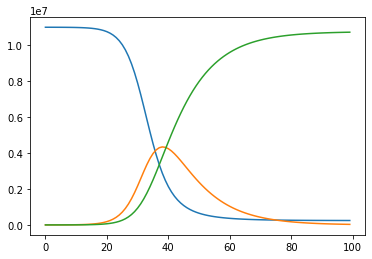

In [25]:
plt.plot(times,sol)